# K-Nearest Neighbour Classifier (KNN) 

In [1]:
from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['aquamarine', 'cornflowerblue', 'orange'])
cmap_bold = ListedColormap( ['turquoise','navy',  'darkorange'])

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


# The KNN Algorithm 

In [2]:
h = 0.01
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
k=15

In [3]:
inputs =  np.c_[xx.ravel(), yy.ravel()]
nInputs = np.shape(inputs)[0]
closest = np.zeros(nInputs)
dataClass = y
data = X
inputs.shape

(246400, 2)

In [4]:
for n in range(nInputs):
	# Compute distances
    distances = np.sum((data-inputs[n,:])**2,axis=1)

	# Identify the nearest neighbours
    indices = np.argsort(distances,axis=0)
    classes = np.unique(dataClass[indices[:k]])
    if len(classes)==1:
        closest[n] = np.unique(classes)   
    else:
        counts = np.zeros(max(classes)+1)
        for i in range(k):
            counts[dataClass[indices[i]]] += 1
        closest[n] = np.argmax(counts)
    #print 'N Distancias:', distances.shape, distances[0], indices[0], 
    #print '\nClases en distancias',classes, closest[n]
    #print counts

In [5]:
closest = closest.reshape(xx.shape)

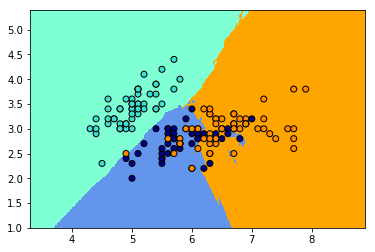

In [6]:
plt.figure()
plt.pcolormesh(xx, yy, closest, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')

plt.show()

In [19]:
from sklearn import neighbors
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',
                                    algorithm='auto',p=2,)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)


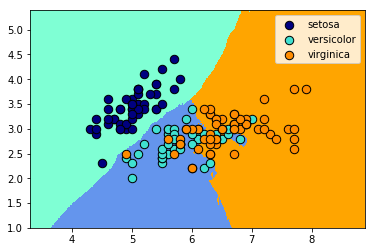

In [17]:
target_ids=[0,1,2]
colors = ['navy', 'turquoise', 'darkorange']
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X[i == y, 0],X[i == y, 1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()

plt.show()